## Import library

In [1]:
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale

## Vat Algorithm

In [2]:
def vat(input_matrix):
    # Get the distance matrix from the input matrix (step 1)
    distance_matrix = ssd.squareform(ssd.pdist(input_matrix, 'euclidean'))
    number_of_row = distance_matrix.shape[0]

    # Initializing step (or step 2)
    # selected_index_list: list to track indexes that are selected (or I in the paper)
    # at the end its length should be number_of_row
    selected_index_list = [0]

    # unselected_index_list: list to track indexes that are not selected yet (or J in the paper)
    # at the end it should be empty
    unselected_index_list = np.arange(number_of_row)
    # initialize step
    unselected_index_list = np.delete(unselected_index_list, 0)
    # order: list that track the order of the final matrix (or R in the paper)
    order = [0]

    # Iteration (step 3)
    for r in range(1, number_of_row):
        i = selected_index_list[-1]
        d = distance_matrix[i, unselected_index_list]
        j = unselected_index_list[np.argmin(d)]
        selected_index_list.append(j)
        unselected_index_list = np.delete(unselected_index_list, np.where(unselected_index_list == j))
        order.append(j)

    # Return order dissimilarity matrix (step 4)
    return distance_matrix[np.ix_(order, order)]

## Load Toy Dataset

In [3]:
# iris dataset
iris = datasets.load_iris().data
iris_scale = scale(iris)

# wine dataset
wine = datasets.load_wine().data
wine_scale = scale(wine)

## Applying VAT Algorithm

In [4]:
iris_reorder = vat(iris)
iris_scale_reorder = vat(iris_scale)

wine_reorder = vat(wine)
wine_scale_reorder = vat(wine_scale)

## Result

### Iris Dataset without Scalling

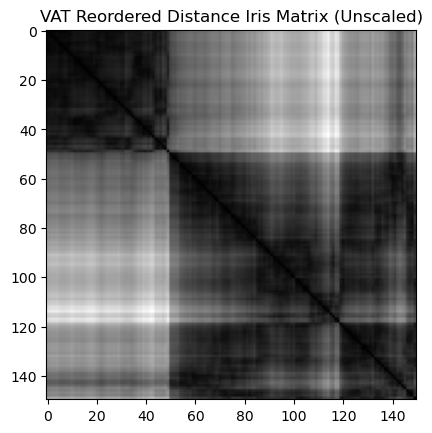

In [5]:
plt.imshow(iris_reorder, cmap='gray')
plt.title('VAT Reordered Distance Iris Matrix (Unscaled)')
plt.show()

### Iris Dataset with Scalling

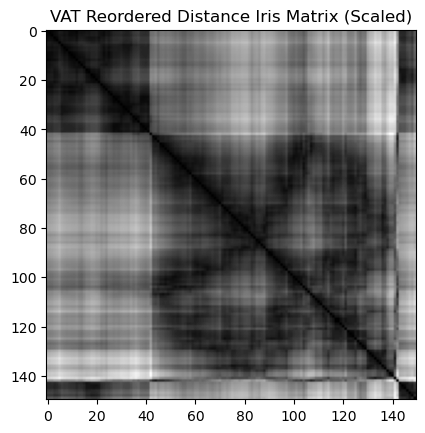

In [6]:
plt.imshow(iris_scale_reorder, cmap='gray')
plt.title('VAT Reordered Distance Iris Matrix (Scaled)')
plt.show()

### Wine Dataset without Scalling

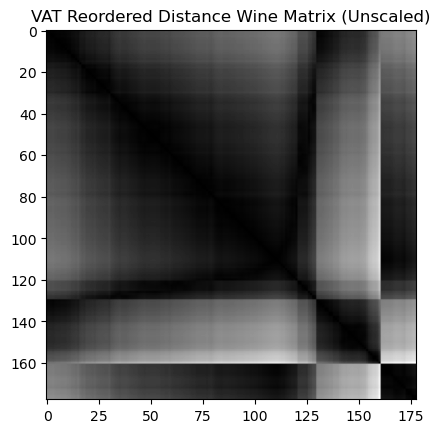

In [7]:
plt.imshow(wine_reorder, cmap='gray')
plt.title('VAT Reordered Distance Wine Matrix (Unscaled)')
plt.show()

### Wine Dataset with Scalling

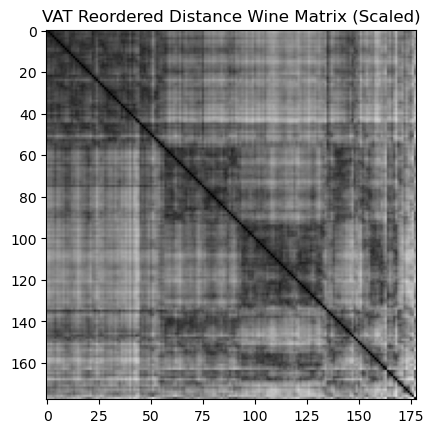

In [8]:
plt.imshow(wine_scale_reorder, cmap='gray')
plt.title('VAT Reordered Distance Wine Matrix (Scaled)')
plt.show()